In [ ]:
!pip install pulp

Status:  Optimal
x1 = 5.0
x2 = 3.0
The optimal value of the objective function is = 46.0
The points are :
6 , 0
9 , 0
8 , 0
6 , 20
0 , 6
0 , 8
Constraints :
x1 <= 6
2*x1 + 3*x2 <= 19
x1 + x2 <= 8


C:\Users\M\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


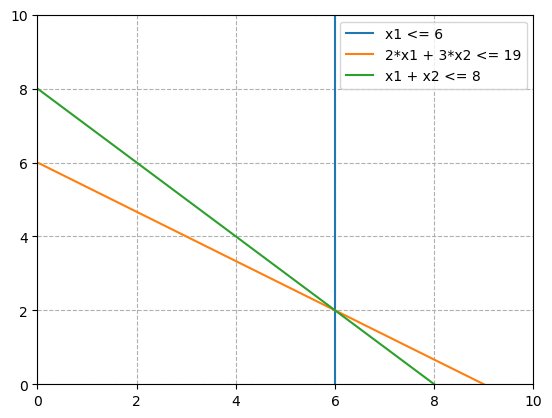

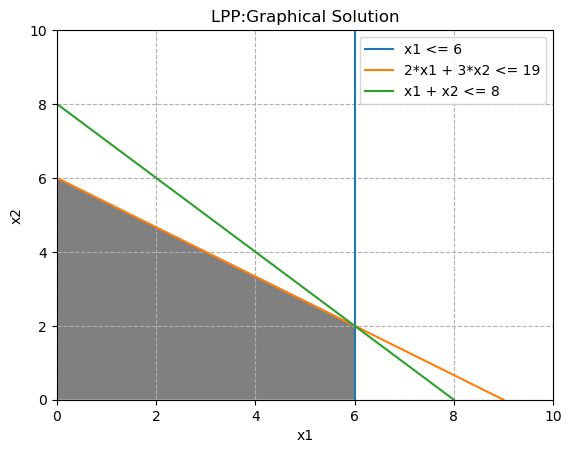

In [116]:
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_excel('4qlaa7.xlsx')
# Create an object of a model
if(data['MAX'][0] == 1):
    prob = LpProblem("Simple LP Problem", LpMaximize)
else:
    prob = LpProblem("Simple LP Problem", LpMinimize)

# Define the decision variables
x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)

# Get The objective function
OF = data['OFX1'][0]*x1 + data['OFX2'][0]*x2
prob += OF
# Get the constraints
constraints = []
for i in range(len(data)):
    Cofx1 = data['x1'][i]
    Cofx2 = data['x2'][i]
    s = data['S'][i]
    rhs = data['RHS'][i]
    CS = '{cofx1}*x1 + {cofx2}*x2 {S} {RHS}'.format(cofx1=Cofx1,cofx2=Cofx2,S=s,RHS=rhs)
    c = eval(CS)
    constraints.append(c)
    prob += c
# Solve the linear programming problem
prob.solve()

#Listing 
x1 =[]
x2 =[]
val=[]
for i in range(len(data)):
    x1.append(data['x1'][i])
    x2.append(data['x2'][i])
    val.append(data['RHS'][i])
# Print the results
print ("Status: ", LpStatus[prob.status])
for v in prob.variables():
    print (v.name,"=", v.varValue)
#x1 = 1.5
#x2 = 1.0
print ("The optimal value of the objective function is =",value(prob.objective))

#getting points
plotx1 = []
plotx2 = []

for i in range(len(x1)):
    if(x1[i]!= 0 or x2[i]!=0):
        plotx1.append(val[i]/x1[i])
        plotx2.append(0)
    else:
        plotx1.append(10)
        plotx2.append(val[i]/x1[i])
for i in range(len(x2)):
    if(x2[i] != 0):    
        plotx1.append(0)
        plotx2.append(val[i]/x2[i])
    else:
        plotx1.append(val[i]/x1[i])
        plotx2.append(20)
    
# Plot the optimal solution
l = len(plotx1)
print("The points are :")
for i in range(len(plotx1)):
    print(int(plotx1[i]),",",int(plotx2[i]))
    if(i < l/2):
        m = int(l/2+i)
        sss = str(constraints[i])
        plt.plot((int(plotx1[i]),int(plotx1[m])),(int(plotx2[i]),int(plotx2[m])),label = sss)

print("Constraints :")
for i in range(len(constraints)):
    print(constraints[i])

plt.axis([0, 10, 0, 10])
plt.grid(True,linestyle='--')
plt.legend()
plt.show()

# Plot the optimal solution
for i in range(len(plotx1)):
    if(i < l/2):
        m = int(l/2+i)
        sss = str(constraints[i])
        plt.plot((int(plotx1[i]),int(plotx1[m])),(int(plotx2[i]),int(plotx2[m])),label = sss)

# Define the boundaries of the feasible area in the plot
x = [0, 0, 6, 6]
y = [0, 6, 2, 0]
plt.fill(x, y, 'grey')


plt.xlabel("x1")
plt.ylabel("x2")
plt.title('LPP:Graphical Solution')
plt.axis([0, 10, 0, 10])
plt.grid(True,linestyle='--')
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not float